In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Analysis

Firstly, we have to load the csv files that we created before.

In [2]:
cars_df = pd.read_csv("data/cars_data.csv", sep=";")
brands_rank = pd.read_csv("data/brands_rank.csv", sep=";")

Now, we can see what is their shape and then, showing a few rows in order to watch the appearance of each dataframe.

In [3]:
np.shape(cars_df)

(103600, 36)

In [4]:
cars_df.head()

,Title,Brand,City,Price,Year,Kms,Fuel,Type of Gears,Seller,Guarantee,...,Autonomy,CO2 Emissions,Output,Cubic Capacity,Cylinders,Max Par,Gears,Transmission,Traction,Url
0,Citroen Jumper 2.2hdi Cl 33 L2h2 150,Citroen,Barcelona,11.529€,07/2014,105.000 km,Diesel,Manual,Profesional,Sí,...,0.0,199 gr/m3,150 cv,2.198 cm3,4 en línea,350 Nm,6,Manual,Delantera,https://www.coches.com/coches-segunda-mano/oca...
1,Volkswagen Passat 2.0tdi Highline Bmt,Volkswagen,Madrid,11.900€,2014,144.000 km,Diesel,Manual,Profesional,Sí,...,0.0,119 gr/m3,140 cv,1.968 cm3,4 en línea,320 Nm,6,Manual,Delantera,https://www.coches.com/coches-segunda-mano/oca...
2,Mercedes Clase Clk Clk 200 K,Mercedes,Madrid,5.400€,2004,160.000 km,Gasolina,Manual,Profesional,Sí,...,0.0,0 gr/m3,163 cv,1.796 cm3,4 en línea,240 Nm,6,Manual,Trasera,https://www.coches.com/coches-segunda-mano/oca...
3,Seat León 2.0tdi Cr S&s Fr 150,Seat,Madrid,15.390€,2016,19.090 km,Diesel,Manual,Profesional,No,...,0.0,112 gr/m3,150 cv,1.968 cm3,4 en línea,340 Nm,6,Manual,Delantera,https://www.coches.com/coches-segunda-mano/oca...
4,Opel Zafira Tourer 2.0cdti Selective 130,Opel,Malaga,11.500€,2015,90.000 km,Diesel,Manual,Profesional,Sí,...,0.0,134 gr/m3,130 cv,1.956 cm3,4 en línea,300 Nm,6,Manual,Delantera,https://www.coches.com/coches-segunda-mano/oca...


In [5]:
np.shape(brands_rank)

(54, 2)

In [6]:
brands_rank.head()

,brand,score
0,ferrari,"1,570"
1,bmw,"1,365"
2,mercedes-benz,"1,295"
3,audi,"1,260"
4,lamborghini,"1,190"


In [7]:
brands_rank.tail()

,brand,score
49,vauxhall,95
50,loncin,55
51,austin rover,50
52,malaguti,20
53,lada,15


The nest step is cleaning the dataset and changing the types of each column.

# Data cleaning and transformation

The first step is looking for NA's.

In [8]:
cars_df.columns

Index(['Title', 'Brand', 'City', 'Price', 'Year', 'Kms', 'Fuel',
       'Type of Gears', 'Seller', 'Guarantee', 'Colour', 'Boot Capacity',
       'Length', 'Height', 'Width', 'Doors', 'Vacancies', 'Tank', 'Weight',
       'Max Weight', 'Car Body', 'Max Speed', 'Comb Fuel', 'Urban Use',
       'Extraurban Use', 'Aceleration', 'Autonomy', 'CO2 Emissions', 'Output',
       'Cubic Capacity', 'Cylinders', 'Max Par', 'Gears', 'Transmission',
       'Traction', 'Url'],
      dtype='object')

In [9]:
cars_df.apply(lambda x: x.isnull().sum())

Title                 0
Brand                 0
City                  0
Price                 0
Year                  0
Kms                   0
Fuel                  0
Type of Gears        11
Seller                0
Guarantee             0
Colour            13661
Boot Capacity         0
Length                0
Height                0
Width                 0
Doors                 0
Vacancies             0
Tank                  0
Weight                0
Max Weight            0
Car Body              0
Max Speed             0
Comb Fuel             0
Urban Use             0
Extraurban Use        0
Aceleration           0
Autonomy              2
CO2 Emissions         0
Output                0
Cubic Capacity        0
Cylinders             0
Max Par               0
Gears                 0
Transmission         11
Traction              0
Url                   0
dtype: int64

We can see that there are some NaN values in our DataFrame.
The next step is deciding what are we going to do with them.

The colour is not very important for our model, so we drop this column.

In [10]:
cars_df = cars_df.drop("Colour", axis=1)

In [11]:
cars_df.columns

Index(['Title', 'Brand', 'City', 'Price', 'Year', 'Kms', 'Fuel',
       'Type of Gears', 'Seller', 'Guarantee', 'Boot Capacity', 'Length',
       'Height', 'Width', 'Doors', 'Vacancies', 'Tank', 'Weight', 'Max Weight',
       'Car Body', 'Max Speed', 'Comb Fuel', 'Urban Use', 'Extraurban Use',
       'Aceleration', 'Autonomy', 'CO2 Emissions', 'Output', 'Cubic Capacity',
       'Cylinders', 'Max Par', 'Gears', 'Transmission', 'Traction', 'Url'],
      dtype='object')

Now we are going to watch what values contains the 'Autonomy' column.

In [12]:
cars_df["Autonomy"].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: Autonomy, dtype: float64

Because of all the values are equal to zero, we are going to drop this column too.

In [13]:
cars_df = cars_df.drop("Autonomy", axis=1)

The next step is deciding what are we going to do with the rest of NaN's. 

In [14]:
cars_df.apply(lambda x: x.isnull().sum())

Title              0
Brand              0
City               0
Price              0
Year               0
Kms                0
Fuel               0
Type of Gears     11
Seller             0
Guarantee          0
Boot Capacity      0
Length             0
Height             0
Width              0
Doors              0
Vacancies          0
Tank               0
Weight             0
Max Weight         0
Car Body           0
Max Speed          0
Comb Fuel          0
Urban Use          0
Extraurban Use     0
Aceleration        0
CO2 Emissions      0
Output             0
Cubic Capacity     0
Cylinders          0
Max Par            0
Gears              0
Transmission      11
Traction           0
Url                0
dtype: int64

It looks that the two columns which contain NaN's contains the same information. Firstly, we drop one of them and then, what we are going to do is removing the raws which contain the NaN's.

In [15]:
cars_df = cars_df.drop("Type of Gears", axis=1)

In [16]:
array_nans = cars_df["Transmission"].isnull()

for i,val in enumerate(array_nans):
    if val == True:
        cars_df = cars_df.drop(i)

In [17]:
cars_df.apply(lambda x: x.isnull().sum())

Title             0
Brand             0
City              0
Price             0
Year              0
Kms               0
Fuel              0
Seller            0
Guarantee         0
Boot Capacity     0
Length            0
Height            0
Width             0
Doors             0
Vacancies         0
Tank              0
Weight            0
Max Weight        0
Car Body          0
Max Speed         0
Comb Fuel         0
Urban Use         0
Extraurban Use    0
Aceleration       0
CO2 Emissions     0
Output            0
Cubic Capacity    0
Cylinders         0
Max Par           0
Gears             0
Transmission      0
Traction          0
Url               0
dtype: int64

We have drop all the NaN's!!

The next step is changing the types of some columns.

In [18]:
cars_df.columns

Index(['Title', 'Brand', 'City', 'Price', 'Year', 'Kms', 'Fuel', 'Seller',
       'Guarantee', 'Boot Capacity', 'Length', 'Height', 'Width', 'Doors',
       'Vacancies', 'Tank', 'Weight', 'Max Weight', 'Car Body', 'Max Speed',
       'Comb Fuel', 'Urban Use', 'Extraurban Use', 'Aceleration',
       'CO2 Emissions', 'Output', 'Cubic Capacity', 'Cylinders', 'Max Par',
       'Gears', 'Transmission', 'Traction', 'Url'],
      dtype='object')

We start watching what is the type of each of them.

In [19]:
for col in cars_df.columns:
    print(cars_df[col].describe(),"\n\n")

count               103589
unique               18300
top       Bmw Serie 1 116d
freq                   638
Name: Title, dtype: object 


count     103589
unique        71
top          Bmw
freq        9965
Name: Brand, dtype: object 


count      103589
unique         52
top       Madrid 
freq        24492
Name: City, dtype: object 


count     103589
unique      4106
top       9.900€
freq        1159
Name: Price, dtype: object 


count      103589
unique        478
top       01/2017
freq         2626
Name: Year, dtype: object 


count     103589
unique     24267
top         0 km
freq        1645
Name: Kms, dtype: object 


count     103589
unique         4
top       Diesel
freq       75417
Name: Fuel, dtype: object 


count          103589
unique              2
top       Profesional
freq            79823
Name: Seller, dtype: object 


count     103589
unique         2
top           No
freq       60823
Name: Guarantee, dtype: object 


count     103589
unique       456
top          0 l

Once we have seen the previous information, we have to change the type of some columns and maybe create new columns and drop old columns.

We start creating a new columns called 'Price (€)' which contains integers, and then removing the old column 'Price'.

In [85]:
cars_df["Price (€)"] = cars_df["Price"].apply(lambda x: float(x.split("€")[0].replace(".", "")))
cars_df = cars_df.drop("Price", axis=1)
cars_df["Price (€)"].head()

0    11529.0
1    11900.0
2     5400.0
3    15390.0
4    11500.0
Name: Price (€), dtype: float64

Now we must be focused in the next column.

In [21]:
cars_df["Year"].head(10)

0    07/2014
1       2014
2       2004
3       2016
4       2015
5       2017
6       2018
7    05/2014
8    03/2012
9    06/2016
Name: Year, dtype: object

We can see that the format is not the same in the rows.

In [22]:
cars_df["Year"] = cars_df["Year"].apply(lambda x: x.split("/"))

In [23]:
years = []

for val in cars_df["Year"]:
    if len(val) == 1: 
        years.append(val[0])
    else:
        years.append(val[1])

In [24]:
cars_df["Year"] = pd.to_numeric(years)

Kms column

In [25]:
cars_df["Kms"].head()

0    105.000 km
1    144.000 km
2    160.000 km
3     19.090 km
4     90.000 km
Name: Kms, dtype: object

In [26]:
cars_df["Kms"] = cars_df["Kms"].apply(lambda x: x.split()[0])
cars_df["Kms"] = pd.to_numeric(cars_df["Kms"].apply(lambda x: x.replace(".", "")))

In [27]:
cars_df["Kms"].head(10)

0    105000
1    144000
2    160000
3     19090
4     90000
5     55000
6        25
7     30000
8    114950
9     23000
Name: Kms, dtype: int64

Boot Capacity column

In [28]:
cars_df["Boot Capacity"].head()

0      0 l
1    565 l
2      0 l
3    380 l
4    152 l
Name: Boot Capacity, dtype: object

In [29]:
cars_df["Boot Capacity (l)"] = pd.to_numeric(cars_df["Boot Capacity"].apply(lambda x: x.split()[0]))
cars_df = cars_df.drop("Boot Capacity", axis=1)

In [30]:
cars_df.columns

Index(['Title', 'Brand', 'City', 'Price', 'Year', 'Kms', 'Fuel', 'Seller',
       'Guarantee', 'Length', 'Height', 'Width', 'Doors', 'Vacancies', 'Tank',
       'Weight', 'Max Weight', 'Car Body', 'Max Speed', 'Comb Fuel',
       'Urban Use', 'Extraurban Use', 'Aceleration', 'CO2 Emissions', 'Output',
       'Cubic Capacity', 'Cylinders', 'Max Par', 'Gears', 'Transmission',
       'Traction', 'Url', 'Price (€)', 'Boot Capacity (l)'],
      dtype='object')

Lenght column

In [31]:
cars_df["Length"].head()

0    541 cm
1    477 cm
2    464 cm
3    428 cm
4    466 cm
Name: Length, dtype: object

In [32]:
cars_df["Length (cm)"] = pd.to_numeric(cars_df["Length"].apply(lambda x: x.split()[0]))
cars_df = cars_df.drop("Length", axis=1)

Height column

In [33]:
cars_df["Height"].head()

0    252 cm
1    147 cm
2    141 cm
3    146 cm
4    169 cm
Name: Height, dtype: object

In [34]:
cars_df["Height (cm)"] = pd.to_numeric(cars_df["Height"].apply(lambda x: x.split()[0]))
cars_df = cars_df.drop("Height", axis=1)

Width column

In [35]:
cars_df["Width"].head()

0    205 cm
1    182 cm
2    174 cm
3    182 cm
4    188 cm
Name: Width, dtype: object

In [36]:
cars_df["Width (cm)"] = pd.to_numeric(cars_df["Width"].apply(lambda x: x.split()[0]))
cars_df = cars_df.drop("Width", axis=1)

In [37]:
cars_df.columns

Index(['Title', 'Brand', 'City', 'Price', 'Year', 'Kms', 'Fuel', 'Seller',
       'Guarantee', 'Doors', 'Vacancies', 'Tank', 'Weight', 'Max Weight',
       'Car Body', 'Max Speed', 'Comb Fuel', 'Urban Use', 'Extraurban Use',
       'Aceleration', 'CO2 Emissions', 'Output', 'Cubic Capacity', 'Cylinders',
       'Max Par', 'Gears', 'Transmission', 'Traction', 'Url', 'Price (€)',
       'Boot Capacity (l)', 'Length (cm)', 'Height (cm)', 'Width (cm)'],
      dtype='object')

Tank column

In [38]:
cars_df["Tank"].head()

0    90 l
1    70 l
2    62 l
3    50 l
4    58 l
Name: Tank, dtype: object

I have created the next function because I could appreciate that the value of some fields was equal to 'l' and I could not parse the value to int.

In [39]:
def change_value(serie):
    result = []
    for val in serie:
        if len(val) == 1:
            result.append(0)
        else:
            result.append(pd.to_numeric(val[0]))
    return result

In [40]:
cars_df["Tank (l)"] = cars_df["Tank"].apply(lambda x: x.split())
cars_df["Tank (l)"] = change_value(cars_df["Tank (l)"])

cars_df = cars_df.drop("Tank", axis=1)

Weight column

In [41]:
cars_df["Weight (kg)"] = pd.to_numeric(cars_df["Weight"].apply(lambda x: x.split()[0]))
cars_df = cars_df.drop("Weight", axis=1)

Max Weight column

In [42]:
cars_df["Max Weight"].head()

0    3.300 kg
1    2.100 kg
2    1.960 kg
3    1.820 kg
4    2.390 kg
Name: Max Weight, dtype: object

In [43]:
cars_df["Max Weight (kg)"] = pd.to_numeric(cars_df["Max Weight"].apply(lambda x: x.split()[0]))
cars_df = cars_df.drop("Max Weight", axis=1)

In [44]:
cars_df["Max Weight (kg)"].head()

0    3.30
1    2.10
2    1.96
3    1.82
4    2.39
Name: Max Weight (kg), dtype: float64

Max Speed column

In [45]:
cars_df["Max Speed"].head()

0      0 km/h
1    211 km/h
2      0 km/h
3    215 km/h
4    191 km/h
Name: Max Speed, dtype: object

In [46]:
cars_df["Max Speed (km/h)"] = cars_df["Max Speed"].apply(lambda x: x.split())
cars_df["Max Speed (km/h)"] = change_value(cars_df["Max Speed (km/h)"])

cars_df = cars_df.drop("Max Speed", axis=1)

In [47]:
cars_df["Max Speed (km/h)"].head()

0      0
1    211
2      0
3    215
4    191
Name: Max Speed (km/h), dtype: int64

Comb Fuel column

In [48]:
cars_df["Comb Fuel"].head()

0     7,2 l
1     4,6 l
2    12,2 l
3     4,4 l
4     5,1 l
Name: Comb Fuel, dtype: object

In [49]:
cars_df["Comb Fuel (l)"] = cars_df["Comb Fuel"].apply(lambda x: x.replace(",",".").split())
cars_df["Comb Fuel (l)"] = change_value(cars_df["Comb Fuel (l)"])

cars_df = cars_df.drop("Comb Fuel", axis=1)

In [50]:
cars_df["Comb Fuel (l)"].head()

0     7.2
1     4.6
2    12.2
3     4.4
4     5.1
Name: Comb Fuel (l), dtype: float64

Urban Use column

In [51]:
cars_df["Urban Use"].head()

0     8,8 l
1     6,0 l
2    15,9 l
3     5,3 l
4     6,2 l
Name: Urban Use, dtype: object

In [52]:
cars_df["Urban Use (l)"] = cars_df["Urban Use"].apply(lambda x: x.replace(",",".").split())
cars_df["Urban Use (l)"] = change_value(cars_df["Urban Use (l)"])

cars_df = cars_df.drop("Urban Use", axis=1)

In [53]:
cars_df["Urban Use (l)"].head()

0     8.8
1     6.0
2    15.9
3     5.3
4     6.2
Name: Urban Use (l), dtype: float64

Extraurban Use column

In [54]:
cars_df["Extraurban Use"].head()

0    6,3 l
1    3,7 l
2    8,6 l
3    3,9 l
4    4,5 l
Name: Extraurban Use, dtype: object

In [55]:
cars_df["Extraurban Use (l)"] = cars_df["Extraurban Use"].apply(lambda x: x.replace(",",".").split())
cars_df["Extraurban Use (l)"] = change_value(cars_df["Extraurban Use (l)"])

cars_df = cars_df.drop("Extraurban Use", axis=1)

In [56]:
cars_df["Extraurban Use (l)"].head()

0    6.3
1    3.7
2    8.6
3    3.9
4    4.5
Name: Extraurban Use (l), dtype: float64

Aceleration column

In [57]:
cars_df["Aceleration"].head()

0     0,0 s
1     9,8 s
2     9,3 s
3     8,4 s
4    11,4 s
Name: Aceleration, dtype: object

In [58]:
cars_df["Aceleration 0-100 (s)"] = cars_df["Aceleration"].apply(lambda x: x.replace(",",".").split())
cars_df["Aceleration 0-100 (s)"] = change_value(cars_df["Aceleration 0-100 (s)"])

cars_df = cars_df.drop("Aceleration", axis=1)

In [59]:
cars_df["Aceleration 0-100 (s)"].head()

0     0.0
1     9.8
2     9.3
3     8.4
4    11.4
Name: Aceleration 0-100 (s), dtype: float64

CO2 Emissions column

In [60]:
cars_df["CO2 Emissions"].head()

0    199 gr/m3
1    119 gr/m3
2      0 gr/m3
3    112 gr/m3
4    134 gr/m3
Name: CO2 Emissions, dtype: object

In [61]:
cars_df["CO2 Emissions (gr/m3)"] = cars_df["CO2 Emissions"].apply(lambda x: x.split())
cars_df["CO2 Emissions (gr/m3)"] = change_value(cars_df["CO2 Emissions (gr/m3)"])

cars_df = cars_df.drop("CO2 Emissions", axis=1)

In [62]:
cars_df["CO2 Emissions (gr/m3)"].head()

0    199
1    119
2      0
3    112
4    134
Name: CO2 Emissions (gr/m3), dtype: int64

Output column

In [63]:
cars_df["Output"].head()

0    150 cv
1    140 cv
2    163 cv
3    150 cv
4    130 cv
Name: Output, dtype: object

In [64]:
cars_df["Output (cv)"] = pd.to_numeric(cars_df["Output"].apply(lambda x: x.split()[0]))

cars_df = cars_df.drop("Output", axis=1)

In [65]:
cars_df["Output (cv)"].head()

0    150
1    140
2    163
3    150
4    130
Name: Output (cv), dtype: int64

Cubic Capacity column

In [66]:
cars_df["Cubic Capacity"].head()

0    2.198 cm3
1    1.968 cm3
2    1.796 cm3
3    1.968 cm3
4    1.956 cm3
Name: Cubic Capacity, dtype: object

In [67]:
cars_df["Cubic Capacity (cm3)"] = pd.to_numeric(cars_df["Cubic Capacity"].apply(lambda x: x.replace(".", "").split()[0]))

cars_df = cars_df.drop("Cubic Capacity", axis=1)

In [68]:
cars_df["Cubic Capacity (cm3)"].head()

0    2198
1    1968
2    1796
3    1968
4    1956
Name: Cubic Capacity (cm3), dtype: int64

Max Par column

In [69]:
cars_df["Max Par"].head()

0    350 Nm
1    320 Nm
2    240 Nm
3    340 Nm
4    300 Nm
Name: Max Par, dtype: object

In [70]:
cars_df["Max Par (Nm)"] = pd.to_numeric(cars_df["Max Par"].apply(lambda x: x.split()[0]))

cars_df = cars_df.drop("Max Par", axis=1)

In [71]:
cars_df["Max Par (Nm)"].head()

0    350
1    320
2    240
3    340
4    300
Name: Max Par (Nm), dtype: int64

In [72]:
cars_df.describe()

,Year,Kms,Doors,Vacancies,Gears,Price (€),Boot Capacity (l),Length (cm),Height (cm),Width (cm),...,Max Weight (kg),Max Speed (km/h),Comb Fuel (l),Urban Use (l),Extraurban Use (l),Aceleration 0-100 (s),CO2 Emissions (gr/m3),Output (cv),Cubic Capacity (cm3),Max Par (Nm)
count,103589.000000,1.035890e+05,103589.000000,103589.000000,103589.000000,1.035890e+05,103589.000000,103589.000000,103589.000000,103589.000000,...,103589.000000,103589.000000,103589.000000,103589.000000,103589.000000,103589.000000,103589.000000,103589.000000,103589.000000,103589.000000
mean,2011.597332,1.119953e+05,4.428964,4.889457,5.816148,1.723646e+04,329.265507,431.918080,151.517381,179.205572,...,3.944100,169.210997,5.548009,6.925563,4.689442,9.987393,120.609042,140.648505,1896.156928,277.963095
std,5.721001,6.673228e+06,0.908159,0.853530,0.943645,2.456455e+04,207.572206,75.488137,28.304250,13.526383,...,42.445984,72.003477,2.112776,3.111961,1.541664,3.525415,61.400117,71.725163,682.071381,121.329222
min,1952.000000,0.000000e+00,0.000000,1.000000,1.000000,5.000000e+02,0.000000,0.000000,0.000000,0.000000,...,1.015000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,2008.000000,1.900000e+04,4.000000,5.000000,5.000000,7.490000e+03,190.000000,419.000000,144.000000,175.000000,...,1.755000,168.000000,4.300000,5.100000,3.800000,8.600000,103.000000,101.000000,1499.000000,200.000000
50%,2013.000000,7.400000e+04,5.000000,5.000000,6.000000,1.285000e+04,361.000000,438.000000,148.000000,180.000000,...,1.940000,189.000000,5.100000,6.200000,4.300000,10.500000,119.000000,120.000000,1799.000000,270.000000
75%,2016.000000,1.400000e+05,5.000000,5.000000,6.000000,2.030000e+04,480.000000,466.000000,163.000000,184.000000,...,2.150000,208.000000,6.300000,7.900000,5.300000,12.000000,149.000000,150.000000,1997.000000,330.000000
max,2018.000000,2.147484e+09,5.000000,16.000000,10.000000,3.259900e+06,994.000000,822.000000,325.000000,247.000000,...,990.000000,407.000000,24.100000,40.400000,15.100000,33.500000,574.000000,1001.000000,8300.000000,1250.000000


# Outliers

Now, we are going to seaerch outliers in numeric columns

In [73]:
cols_outliers = []

for col in cars_df.columns:
    if isinstance(cars_df[col][0], np.int64) or isinstance(cars_df[col][0], float):
        cols_outliers.append(col)

cols_outliers

['Year',
 'Kms',
 'Doors',
 'Vacancies',
 'Gears',
 'Price (€)',
 'Boot Capacity (l)',
 'Length (cm)',
 'Height (cm)',
 'Width (cm)',
 'Tank (l)',
 'Weight (kg)',
 'Max Weight (kg)',
 'Max Speed (km/h)',
 'Comb Fuel (l)',
 'Urban Use (l)',
 'Extraurban Use (l)',
 'Aceleration 0-100 (s)',
 'CO2 Emissions (gr/m3)',
 'Output (cv)',
 'Cubic Capacity (cm3)',
 'Max Par (Nm)']

Plotting the previous columns using boxplots. The number of doors, the vacancies and the gears will not be plotted.

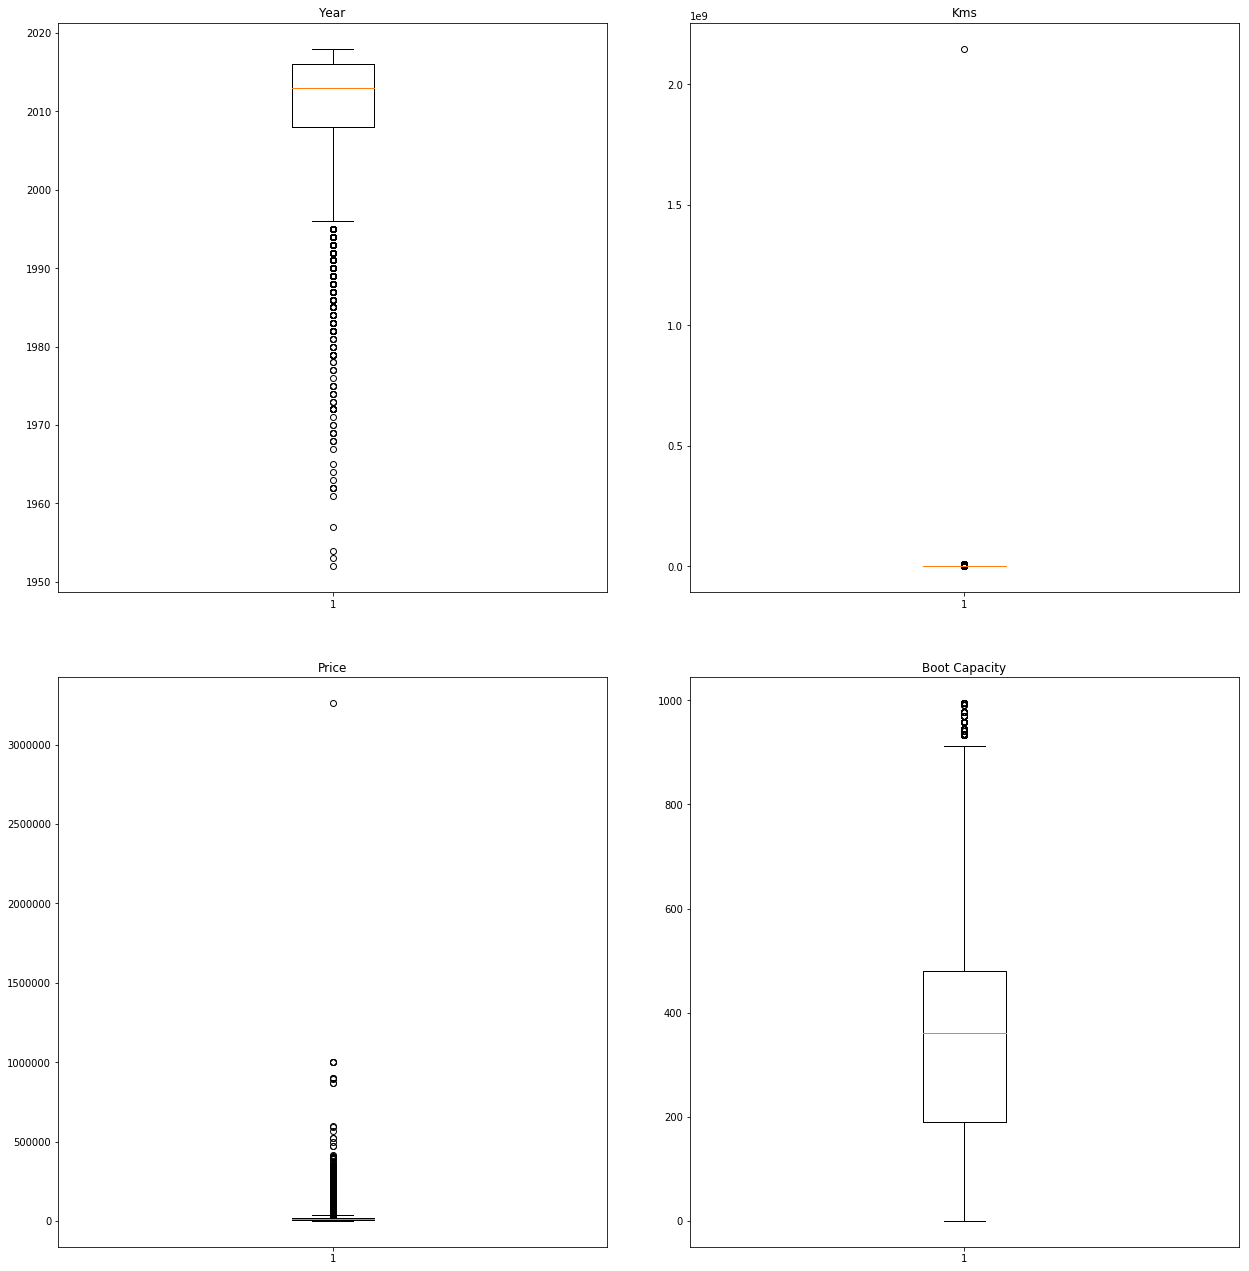

In [74]:
fig, axs = plt.subplots(2,2)

# Year
axs[0, 0].boxplot(cars_df["Year"])
axs[0, 0].set_title('Year')

# Kms
axs[0, 1].boxplot(cars_df["Kms"])
axs[0, 1].set_title('Kms')

# Price (€)
axs[1, 0].boxplot(cars_df["Price (€)"])
axs[1, 0].set_title('Price (€)')

# Boot Capacity (l)
axs[1, 1].boxplot(cars_df["Boot Capacity (l)"])
axs[1, 1].set_title('Boot Capacity (l)')

fig.subplots_adjust(left=0.08, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.15)
fig.set_size_inches(20, 20)

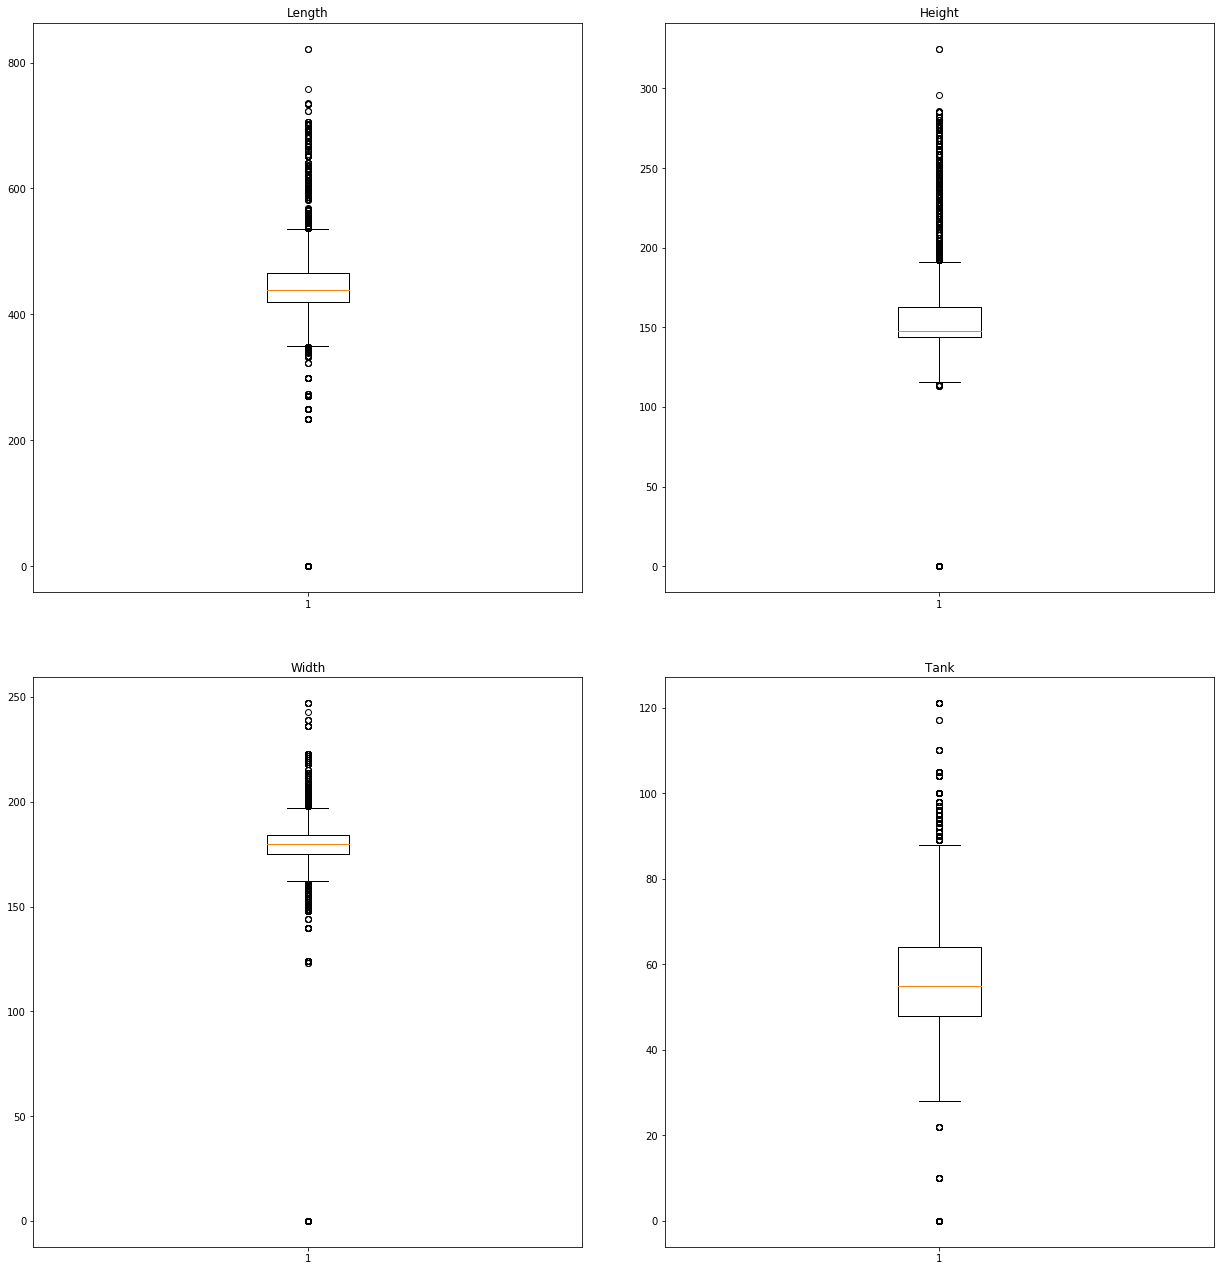

In [75]:
fig, axs = plt.subplots(2,2)

# Length (cm)
axs[0, 0].boxplot(cars_df["Length (cm)"])
axs[0, 0].set_title('Length (cm)')

# Height
axs[0, 1].boxplot(cars_df["Height (cm)"])
axs[0, 1].set_title('Height (cm)')

# Width
axs[1, 0].boxplot(cars_df["Width (cm)"])
axs[1, 0].set_title('Width (cm)')

# Tank
axs[1, 1].boxplot(cars_df["Tank (l)"])
axs[1, 1].set_title('Tank (l)')

fig.subplots_adjust(left=0.08, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.15)

fig.set_size_inches(20, 20)

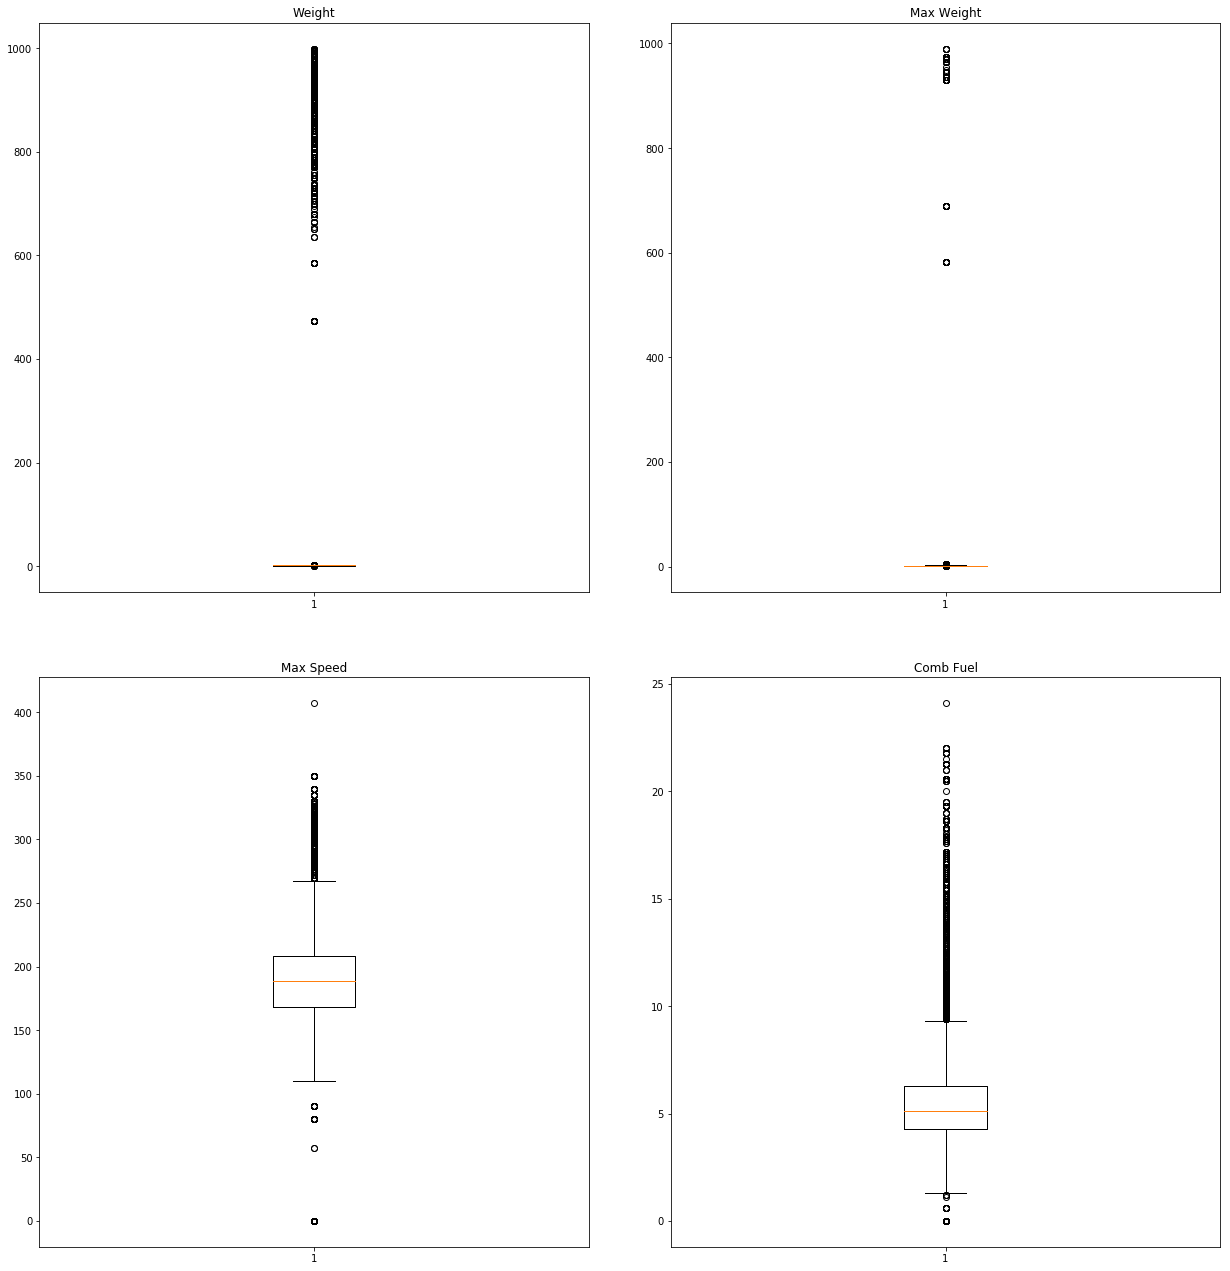

In [76]:
fig, axs = plt.subplots(2,2)

# Weight
axs[0, 0].boxplot(cars_df["Weight (kg)"])
axs[0, 0].set_title('Weight (kg)')

# Max Weight
axs[0, 1].boxplot(cars_df["Max Weight (kg)"])
axs[0, 1].set_title('Max Weight (kg)')

# Max Speed
axs[1, 0].boxplot(cars_df["Max Speed (km/h)"])
axs[1, 0].set_title('Max Speed (km/h)')

# Comb Fuel
axs[1, 1].boxplot(cars_df["Comb Fuel (l)"])
axs[1, 1].set_title('Comb Fuel (l)')

fig.subplots_adjust(left=0.08, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.15)

fig.set_size_inches(20, 20)

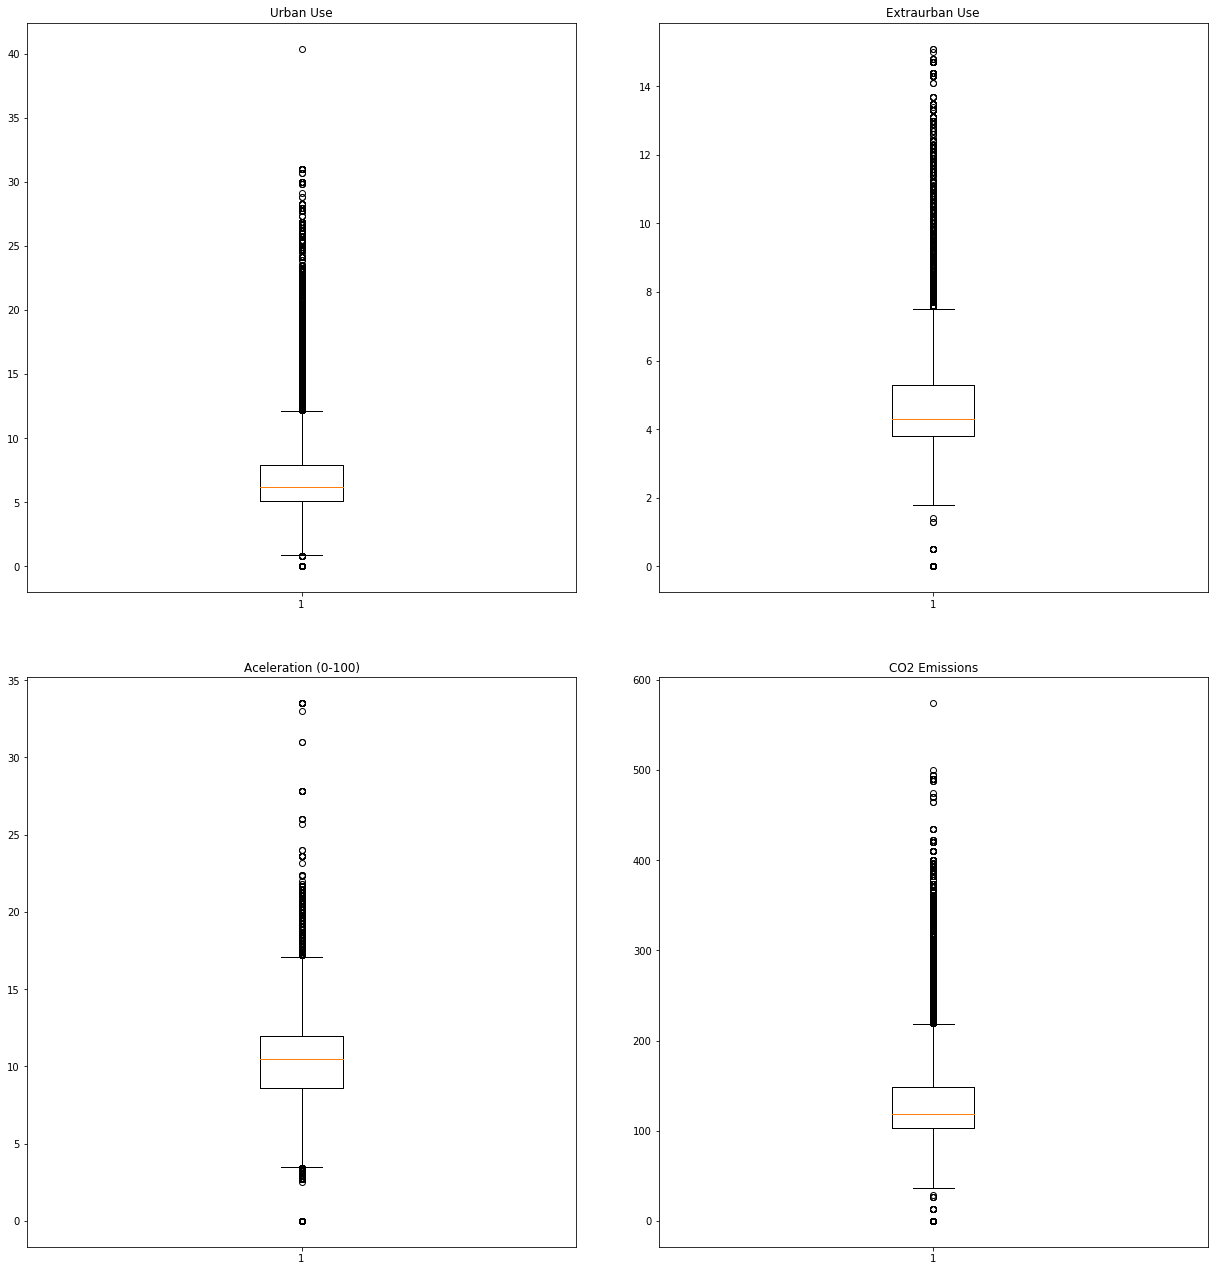

In [77]:
fig, axs = plt.subplots(2,2)

# Urban Use
axs[0, 0].boxplot(cars_df["Urban Use (l)"])
axs[0, 0].set_title('Urban Use (l)')

# Extraurban Use
axs[0, 1].boxplot(cars_df["Extraurban Use (l)"])
axs[0, 1].set_title('Extraurban Use (l)')

# Aceleration
axs[1, 0].boxplot(cars_df["Aceleration 0-100 (s)"])
axs[1, 0].set_title('Aceleration 0-100 (s)')

# CO2 Emissions
axs[1, 1].boxplot(cars_df["CO2 Emissions (gr/m3)"])
axs[1, 1].set_title('CO2 Emissions (gr/m3)')

fig.subplots_adjust(left=0.08, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.15)

fig.set_size_inches(20, 20)

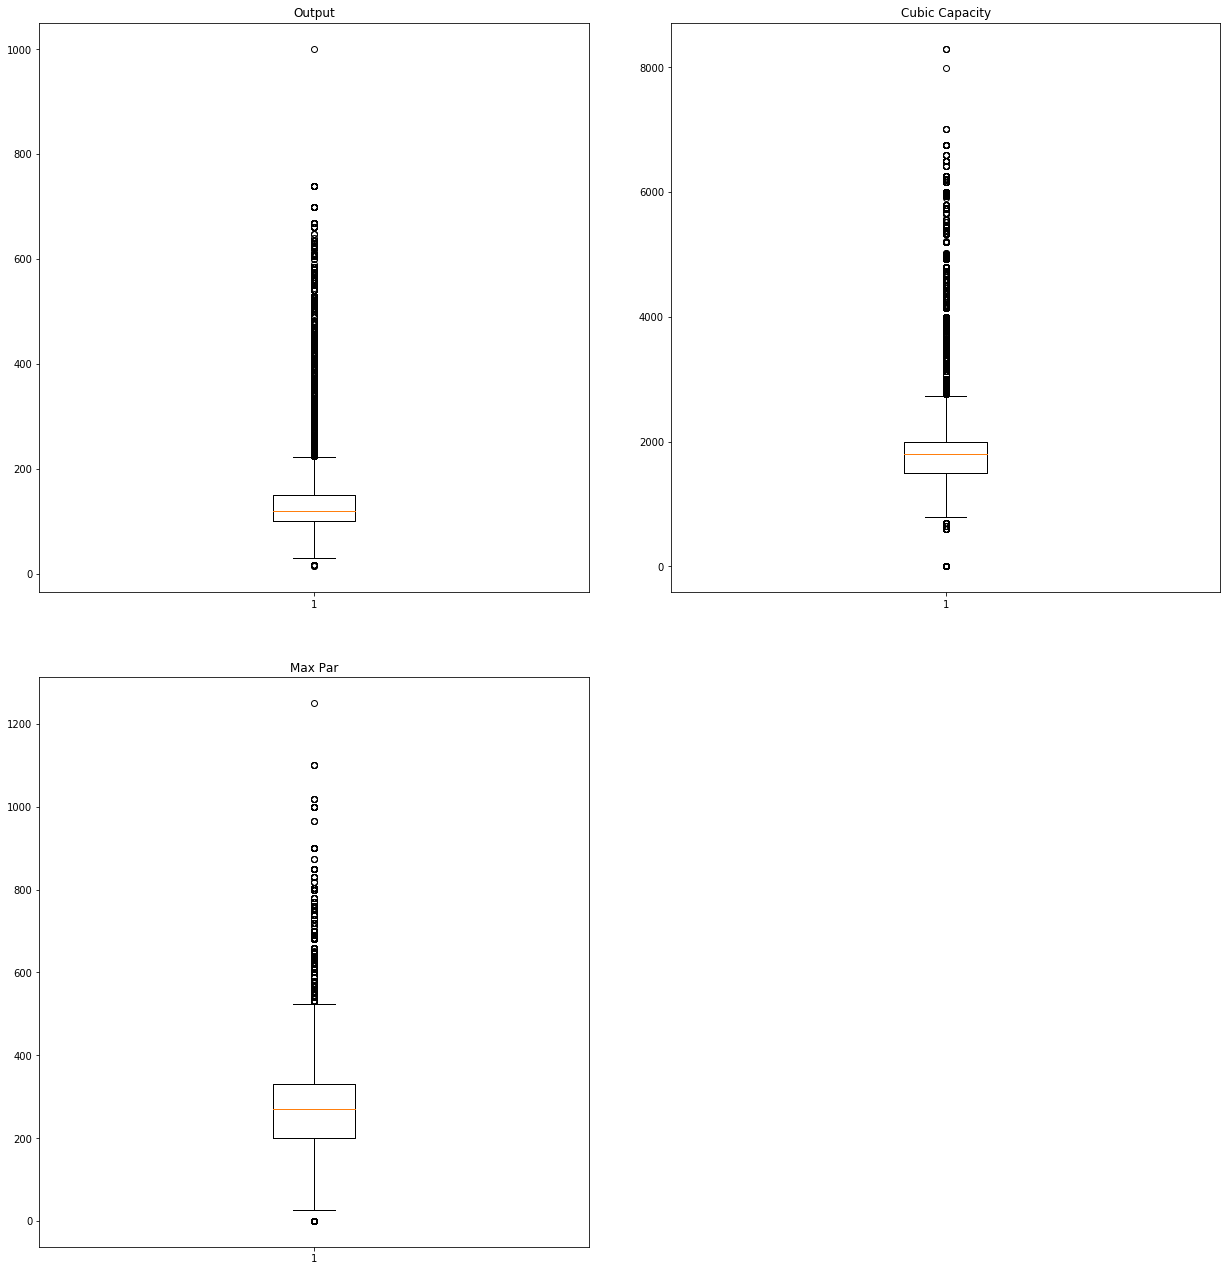

In [78]:
fig, axs = plt.subplots(2,2)

# Output
axs[0, 0].boxplot(cars_df["Output (cv)"])
axs[0, 0].set_title('Output (cv)')

# Cubic Capacity
axs[0, 1].boxplot(cars_df["Cubic Capacity (cm3)"])
axs[0, 1].set_title('Cubic Capacity (cm3)')

# Max Par
axs[1, 0].boxplot(cars_df["Max Par (Nm)"])
axs[1, 0].set_title('Max Par (Nm)')

# Remove the extra plot
fig.delaxes(axs[1, 1])

fig.subplots_adjust(left=0.08, right=0.9, bottom=0.05, top=0.9,
                    hspace=0.15, wspace=0.15)

fig.set_size_inches(20, 20)

There are not relevant outliers.

The next step is choosing a model to predict the price of every car.

In [113]:
from sklearn import linear_model

In [101]:
X = cars_df[list(set(cars_df.columns)-set(["Price (€)"]))].values
y = cars_df["Price (€)"]

In [106]:
X.shape

(103589, 32)

In [115]:
# clf = linear_model.SGDRegressor()
# clf.fit(X, y)
cars_df.columns

Index(['Title', 'Brand', 'City', 'Year', 'Kms', 'Fuel', 'Seller', 'Guarantee',
       'Doors', 'Vacancies', 'Car Body', 'Cylinders', 'Gears', 'Transmission',
       'Traction', 'Url', 'Price (€)', 'Boot Capacity (l)', 'Length (cm)',
       'Height (cm)', 'Width (cm)', 'Tank (l)', 'Weight (kg)',
       'Max Weight (kg)', 'Max Speed (km/h)', 'Comb Fuel (l)', 'Urban Use (l)',
       'Extraurban Use (l)', 'Aceleration 0-100 (s)', 'CO2 Emissions (gr/m3)',
       'Output (cv)', 'Cubic Capacity (cm3)', 'Max Par (Nm)'],
      dtype='object')